In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [58]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [59]:
import os
import glob
import pandas as pd

# Set your folder path
folder_path = '/content/drive/MyDrive/23andme'

# Use glob to get all CSV files in that folder
csv_files = glob.glob(os.path.join(folder_path, '*.csv'))

# Create a list to store individual DataFrames
dfs = []

# Loop through each file and read it
for file in csv_files:
    df = pd.read_csv(file)
    dfs.append(df)
    print(f"Loaded: {os.path.basename(file)} with shape {df.shape}")

# Concatenate all DataFrames into one
merged_df = pd.concat(dfs, ignore_index=True)

# Save the merged DataFrame as a new CSV
output_path = os.path.join(folder_path, 'merged_23andme_data.csv')
merged_df.to_csv(output_path, index=False)

print(f"\n Successfully merged {len(csv_files)} CSV files!")
print(f" Output file saved at: {output_path}")
print(f" Final merged shape: {merged_df.shape}")


Loaded: sales_week_starting_2013-02-11.csv with shape (3704, 2)
Loaded: sales_week_starting_2013-04-15.csv with shape (3558, 2)
Loaded: sales_week_starting_2013-06-03.csv with shape (4912, 2)
Loaded: sales_week_starting_2013-06-10.csv with shape (4965, 2)
Loaded: sales_week_starting_2012-11-26.csv with shape (3622, 2)
Loaded: sales_week_starting_2013-07-15.csv with shape (4934, 2)
Loaded: sales_week_starting_2013-03-11.csv with shape (3461, 2)
Loaded: sales_week_starting_2013-01-28.csv with shape (3550, 2)
Loaded: sales_week_starting_2013-07-01.csv with shape (4731, 2)
Loaded: sales_week_starting_2013-03-04.csv with shape (3576, 2)
Loaded: sales_week_starting_2013-07-29.csv with shape (4986, 2)
Loaded: sales_week_starting_2013-07-08.csv with shape (4851, 2)
Loaded: sales_week_starting_2013-08-19.csv with shape (4819, 2)
Loaded: sales_week_starting_2012-12-10.csv with shape (3599, 2)
Loaded: sales_week_starting_2012-10-22.csv with shape (3463, 2)
Loaded: sales_week_starting_2013-02-25.c

/tmp/ipython-input-4280219047.py:16: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file)


Loaded: merged_23andme_data.csv with shape (3882251, 3)
Loaded: merged_23andme_data_cleaned.csv with shape (3882251, 2)

 Successfully merged 52 CSV files!
 Output file saved at: /content/drive/MyDrive/23andme/merged_23andme_data.csv
 Final merged shape: (7968831, 3)


In [60]:
import pandas as pd

# ✅ Load your merged CSV file
file_path = '/content/drive/MyDrive/23andme/merged_23andme_data.csv'
df = pd.read_csv(file_path)

# ✅ Remove the 'source_file' column if it exists
if 'source_file' in df.columns:
    df = df.drop(columns=['source_file'])
    print("'source_file' column removed successfully.")
else:
    print("Column 'source_file' not found in DataFrame.")

# ✅ Save the cleaned DataFrame
cleaned_path = '/content/drive/MyDrive/23andme/merged_23andme_data_cleaned.csv'
df.to_csv(cleaned_path, index=False)

# ✅ Display confirmation
print(f"\n Cleaned file saved at: {cleaned_path}")
print(f" New DataFrame shape: {df.shape}")
print("\n First 5 rows after cleanup:")
print(df.head())


/tmp/ipython-input-2301200565.py:5: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


'source_file' column removed successfully.

 Cleaned file saved at: /content/drive/MyDrive/23andme/merged_23andme_data_cleaned.csv
 New DataFrame shape: (7968831, 2)

 First 5 rows after cleanup:
             sale_time purchaser_gender
0  2013-02-11 01:08:35             male
1  2013-02-11 01:35:04           female
2  2013-02-11 02:00:29           female
3  2013-02-11 02:08:28           female
4  2013-02-11 02:09:32           female


In [61]:
df.columns

Index(['sale_time', 'purchaser_gender'], dtype='object')

In [62]:
df.head(5)

,sale_time,purchaser_gender
0,2013-02-11 01:08:35,male
1,2013-02-11 01:35:04,female
2,2013-02-11 02:00:29,female
3,2013-02-11 02:08:28,female
4,2013-02-11 02:09:32,female


In [63]:
df.shape

(7968831, 2)

## 1) Plot daily sales for all 50 weeks.

In [64]:
FIG_SIZE = (8,6)

In [65]:
sale_day = pd.to_datetime(df['sale_time'])

In [66]:
daily_sales_df = sale_day.groupby(sale_day.dt.floor('d')).size().reset_index(name='sales_amount')
daily_sales_df.rename(columns={'sale_time':'sale_day'},inplace=True)
daily_sales_df.head()


,sale_day,sales_amount
0,2012-10-01,20046
1,2012-10-02,18798
2,2012-10-03,19461
3,2012-10-04,21294
4,2012-10-05,18564


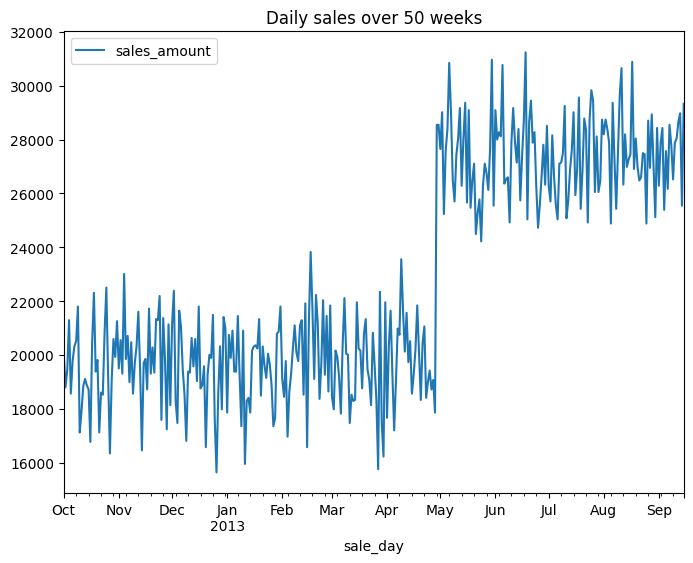

In [67]:
#  to use index in plotting make sale_day index
daily_sales_df.index = daily_sales_df['sale_day']
daily_sales_df.drop(columns=['sale_day'], inplace=True)

#  plot daily sales for all 50 weeks
daily_sales_df.plot(figsize=FIG_SIZE, title = "Daily sales over 50 weeks")
plt.show()

## Question 2
It looks like there has been a sudden change in daily sales. What date did it occur?

In [42]:
daily_sales_df['prev_day_sales_amount'] = [None] + daily_sales_df['sales_amount'].to_list()[:-1]
daily_sales_df['difference_btw_prev_day'] = daily_sales_df['sales_amount'] - daily_sales_df['prev_day_sales_amount']
daily_sales_df.head()

,sales_amount,prev_day_sle_amount,prev_day_sales_amount,difference_btw_prev_day
sale_day,,,,
2012-10-01,9766,NaN,NaN,NaN
2012-10-02,9158,9766.0,9766.0,-608.0
2012-10-03,9481,9158.0,9158.0,323.0
2012-10-04,10374,9481.0,9481.0,893.0
2012-10-05,9044,10374.0,10374.0,-1330.0


In [52]:
# get the index of max change to answer what date did it occur
max_change_date = daily_sales_df['difference_btw_prev_day'].idxmax()
daily_sales_df.loc[[max_change_date]]

,sales_amount,prev_day_sle_amount,prev_day_sales_amount,difference_btw_prev_day
sale_day,,,,
2013-04-29,13908,8702.0,8702.0,5206.0


## Question 3
Is the change in daily sales at the date you selected statistically significant? If so, what is the p-value?

In [72]:
from scipy import stats

change_date = '2013-04-29'

before = daily_sales_df[daily_sales_df.index < change_date]['sales_amount']
after = daily_sales_df[daily_sales_df.index >= change_date]['sales_amount']

t_stat, p_value = stats.ttest_ind(before,after,equal_var=False)
print("t-statistic:", t_stat)
print("p-value:", p_value)

t-statistic: -45.943533193935615
p-value: 3.487246853115063e-138


## Question 4
Does the data suggest that the change in daily sales is due to a shift in the proportion of male-vs-female customers? Please use plots to support your answer (a rigorous statistical analysis is not necessary).

In [73]:
# create gender_portions_df to analyze sales distribution over genders
df['sale_day'] = pd.to_datetime(df['sale_time']).dt.floor('d')
gender_portions_df = df.groupby(['sale_day', 'purchaser_gender']).size().reset_index(name='sales_amount')

In [74]:
# calculate female and male sales amount separately
new_df = pd.DataFrame(gender_portions_df['sale_day'].unique(),columns=['sale_day'])
new_df['female_sales_amount'] = pd.Series(gender_portions_df[gender_portions_df.purchaser_gender == 'female']['sales_amount']).reset_index(drop=True)
new_df['male_sales_amount'] = pd.Series(gender_portions_df[gender_portions_df.purchaser_gender == 'male']['sales_amount']).reset_index(drop=True)
new_df[-5:]

,sale_day,female_sales_amount,male_sales_amount
345,2013-09-11,8736,19305
346,2013-09-12,8775,19890
347,2013-09-13,8034,20943
348,2013-09-14,7527,18018
349,2013-09-15,8970,20358


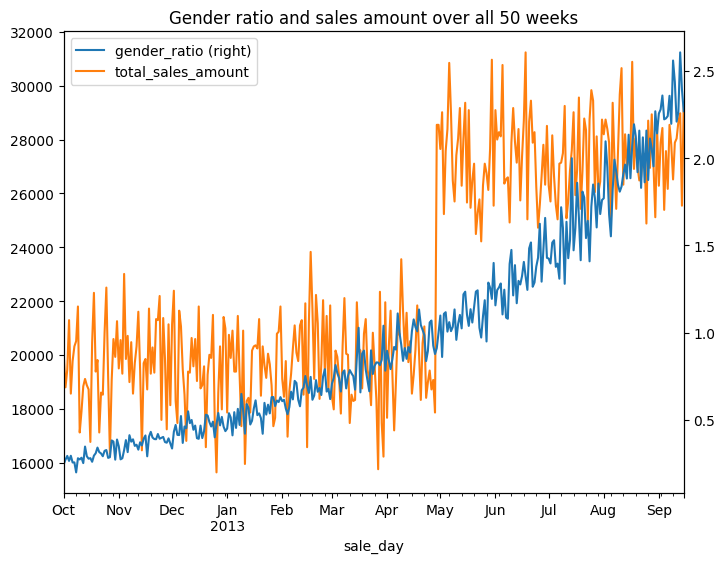

In [75]:
# calculate gender ratio of sales
new_df['gender_ratio'] = new_df['male_sales_amount']/new_df['female_sales_amount']

# plot gender ratio change over 50 weeks with the total sales amount
# observe if there is a correlation between them
plot_df = new_df.copy()
plot_df['total_sales_amount']  = plot_df['male_sales_amount'] + plot_df['female_sales_amount']
plot_df.drop(columns=['female_sales_amount', 'male_sales_amount'], inplace=True)
plot_df.index = plot_df['sale_day']
plot_df.drop(columns=['sale_day'], inplace=True)
plot_df.plot(secondary_y = ['gender_ratio'],figsize=FIG_SIZE, title= "Gender ratio and sales amount over all 50 weeks")
plt.show()

The increasing trend of the male ratio in the sales amount does not explain the sudden change. The reason should be something different. For example, it might be caused by starting a new marketing campaign or adding a new feature to the website.

## Question 5
Assume a given day is divided into four dayparts: night (12:00AM - 6:00AM), morning (6:00AM to 12:00PM), afternoon (12:00PM to 6:00PM) and evening (6:00PM - 12:00AM). What is the percentage of sales in each daypart over all 50 weeks?

In [76]:
df['sale_hour'] = pd.to_datetime(df['sale_time']).dt.ceil('h').dt.hour
df.dtypes

,0
sale_time,object
purchaser_gender,object
sale_day,datetime64[ns]
sale_hour,int32


In [79]:
# define a function to apply sale hour column to decide a part of day based on the mentioned logic
def assign_day_part(sale_hour):
    """Assign labels based on sale hour."""
    if sale_hour >= 6 and sale_hour < 12:
        return 'morning'
    if sale_hour >= 12 and sale_hour < 18:
        return 'afternoon'
    if sale_hour >= 18 and sale_hour < 24:
        return 'evening'
    if sale_hour >= 0 and sale_hour < 6:
        return 'night'

In [80]:
# apply the defined function and create day_part column
df['day_part'] = df['sale_hour'].apply(assign_day_part)

# drop unnecessary columns
df.drop(columns = ['purchaser_gender', 'sale_hour', 'sale_time'], inplace= True)

In [82]:
# calculate sales amount per day part
df_pct_sales = df.groupby(df.day_part).size().reset_index(name='day_part_sales_amount')

# calculate sales amount percentage per day part
df_pct_sales['day_part_sales_percentage'] = df_pct_sales['day_part_sales_amount'] / df_pct_sales['day_part_sales_amount'].sum()

In [83]:
df_pct_sales

,day_part,day_part_sales_amount,day_part_sales_percentage
0,afternoon,3165201,0.397198
1,evening,2087397,0.261945
2,morning,2187120,0.274459
3,night,529113,0.066398
